In [18]:
import os, dill
from dev.constants import gdrive_path

import pandas as pd
import torch as t
import umap

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = f"{gdrive_path}/climatex_full/embeddings"

report = "AR6"
files = [f for f in os.listdir(path) if report in f]

In [6]:
data, tags, topics = [], [], []
for file in files:
    data.append(t.load(f"{path}/{file}", pickle_module=dill))
    topic_file = file.replace(".pt", "_topics.jsonl")
    df = pd.read_json(f"{gdrive_path}/climatex_full/topics/{topic_file}", orient="records", lines=True)
    tags.extend(df["tag"].tolist())
    topics.extend(df["topic"].tolist())

data = t.concat(data)
reducer = umap.UMAP(n_components=2)
data = reducer.fit_transform(data)

In [10]:
data = reducer.fit_transform(data)

In [12]:
df = pd.DataFrame()
df["tag"] = tags
df["topic"] = topics
df["x"] = data[:, 0]
df["y"] = data[:, 1]

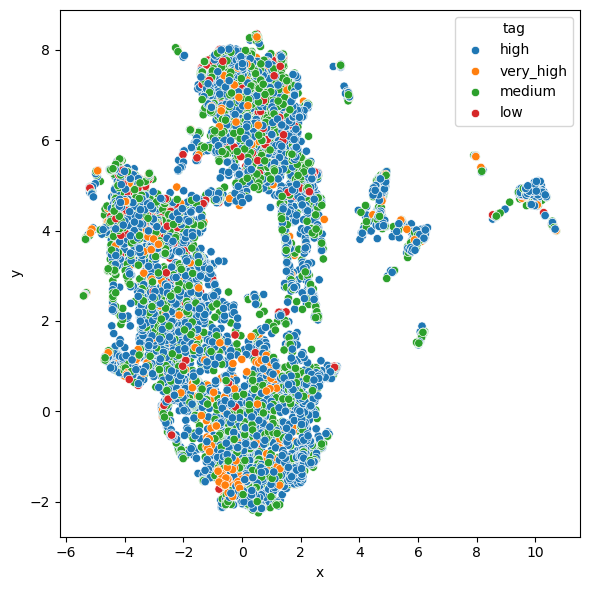

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=df, x="x", y="y", hue="tag", ax=ax)

plt.tight_layout()
plt.show()

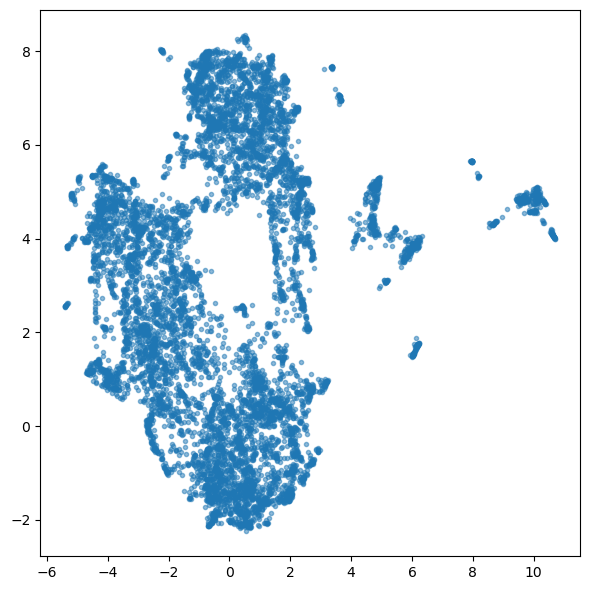

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(x=df["x"], y=df["y"], alpha=0.5, marker=".")

plt.tight_layout()
plt.show()